In [386]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [387]:
roomA = pd.read_csv("DEVICE A - Bedroom A.csv",parse_dates=["Timestamp"])
roomB = pd.read_csv("DEVICE B - Bedroom B.csv",parse_dates=["Timestamp"])
livingRoom = pd.read_csv("DEVICE C - Living Room.csv",parse_dates=["Timestamp"])

# ts["hour"] = pd.to_datetime(ts["timestamp"]).dt.hour
# ts.head()

<AxesSubplot:title={'center':'Temperature and Humidity readings for Bedroom A'}, xlabel='Timestamp', ylabel='Temperature Celcius | Humidity %'>

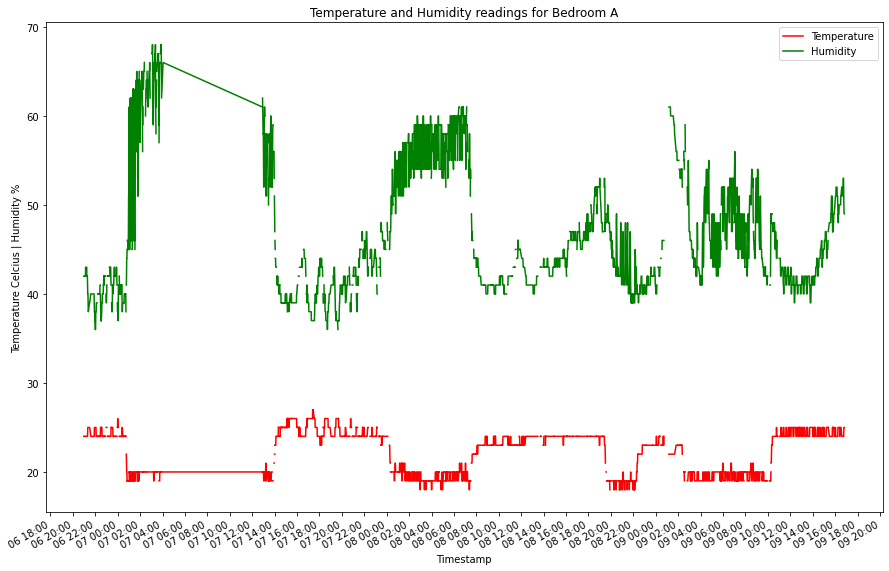

In [388]:
fig , axs = plt.subplots(1,figsize=(15,10))
axs.set(xlabel="Time of day",
        ylabel="Temperature Celcius | Humidity %",
        title="Temperature and Humidity readings for Bedroom A")
date_form = DateFormatter("%d %H:%M")

axs.xaxis.set_major_formatter(date_form)
axs.xaxis.set_major_locator(mdates.HourLocator(interval=2))
roomA.plot(x="Timestamp",y=["Temperature","Humidity"],color=["red","green"],ax=axs)

<AxesSubplot:title={'center':'Temperature and Humidity readings for Bedroom B'}, xlabel='Timestamp', ylabel='Temperature Celcius | Humidity %'>

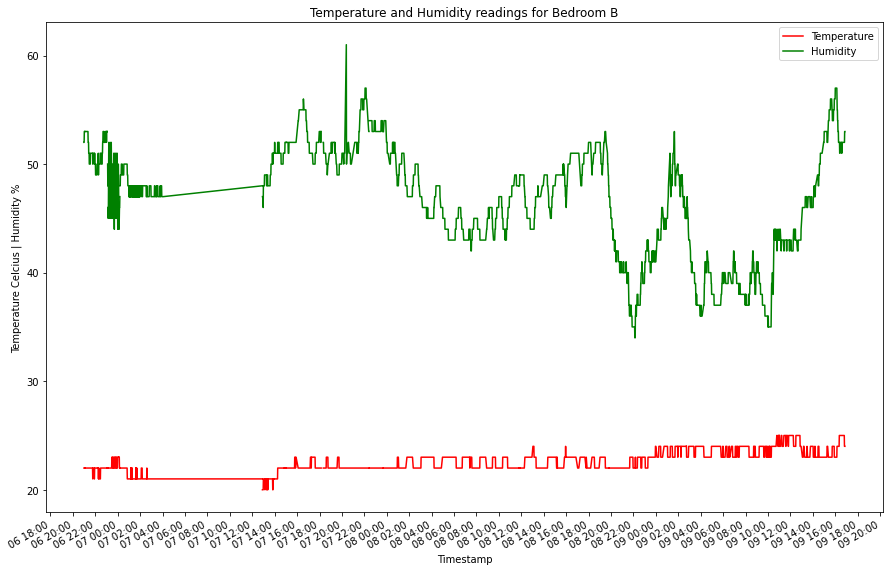

In [389]:
fig , axs = plt.subplots(1,figsize=(15,10))
axs.set(xlabel="Time of day",
        ylabel="Temperature Celcius | Humidity %",
        title="Temperature and Humidity readings for Bedroom B")
date_form = DateFormatter("%d %H:%M")

axs.xaxis.set_major_formatter(date_form)
axs.xaxis.set_major_locator(mdates.HourLocator(interval=2))
roomB.plot(x="Timestamp",y=["Temperature","Humidity"],color=["red","green"],ax=axs)

<AxesSubplot:title={'center':'Temperature and Humidity readings for living room'}, xlabel='Timestamp', ylabel='Temperature Celcius | Humidity %'>

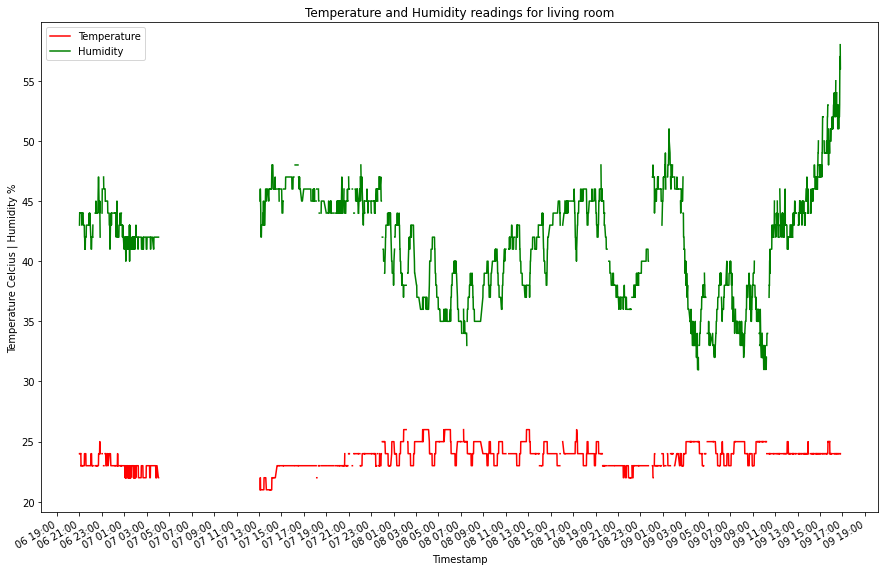

In [390]:
fig , axs = plt.subplots(1,figsize=(15,10))
axs.set(xlabel="Time of day",
        ylabel="Temperature Celcius | Humidity %",
        title="Temperature and Humidity readings for living room")
date_form = DateFormatter("%d %H:%M")

axs.xaxis.set_major_formatter(date_form)
axs.xaxis.set_major_locator(mdates.HourLocator(interval=2))
livingRoom.plot(x="Timestamp",y=["Temperature","Humidity"],color=["red","green"],ax=axs)

<AxesSubplot:title={'center':'Bedroom B'}, xlabel='Timestamp'>

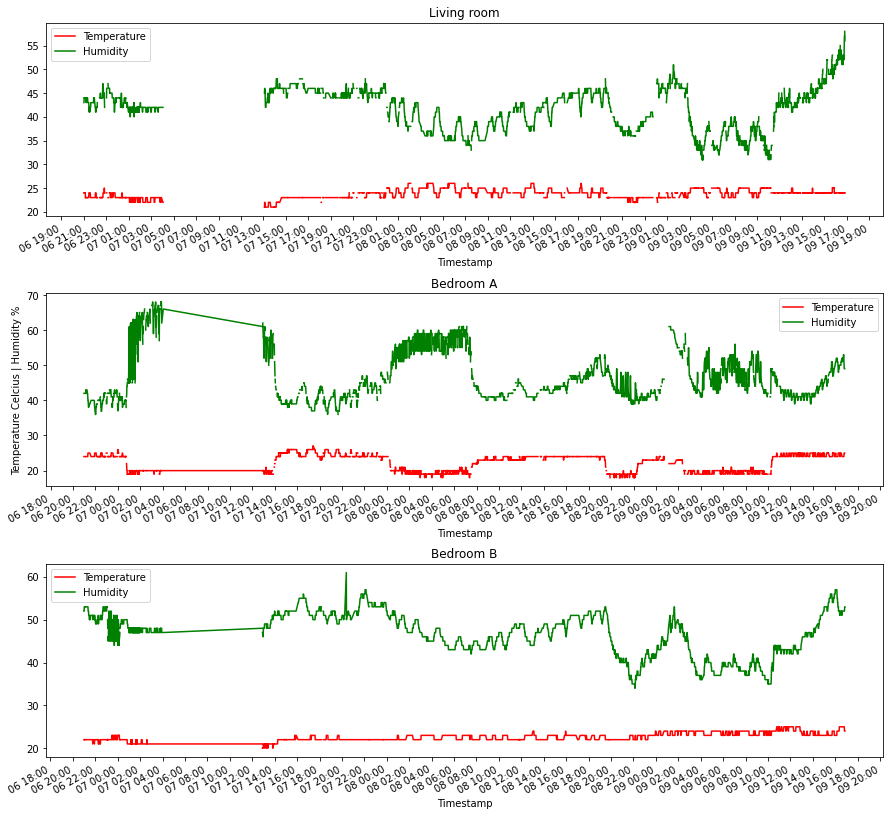

In [391]:
fig , axs = plt.subplots(3,1,figsize=(15,15))
for ax in axs:     
        ax.xaxis.set_major_formatter(date_form)
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))

axs[0].set(title="Living room")
axs[1].set(ylabel="Temperature Celcius | Humidity %",title="Bedroom A")
axs[2].set(xlabel="Time of day",title="Bedroom B")
plt.subplots_adjust(hspace=0.4)
date_form = DateFormatter("%d %H:%M")
# axs= roomB.plot()

livingRoom.plot(x="Timestamp",y=["Temperature","Humidity"],color=["red","green"],ax=axs[0])
roomA.plot(x="Timestamp",y=["Temperature","Humidity"],color=["red","green"],ax=axs[1])
roomB.plot(x="Timestamp",y=["Temperature","Humidity"],color=["red","green"],ax=axs[2])

<AxesSubplot:title={'center':'Bedroom B'}, xlabel='Timestamp'>

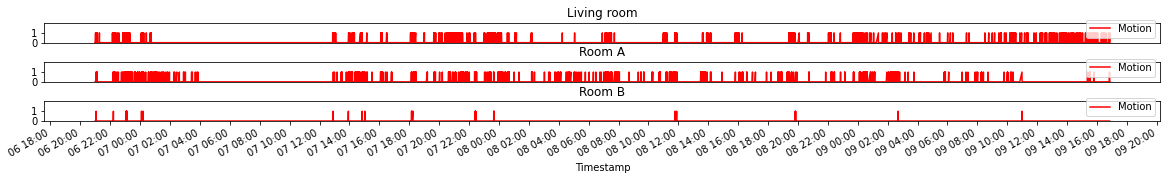

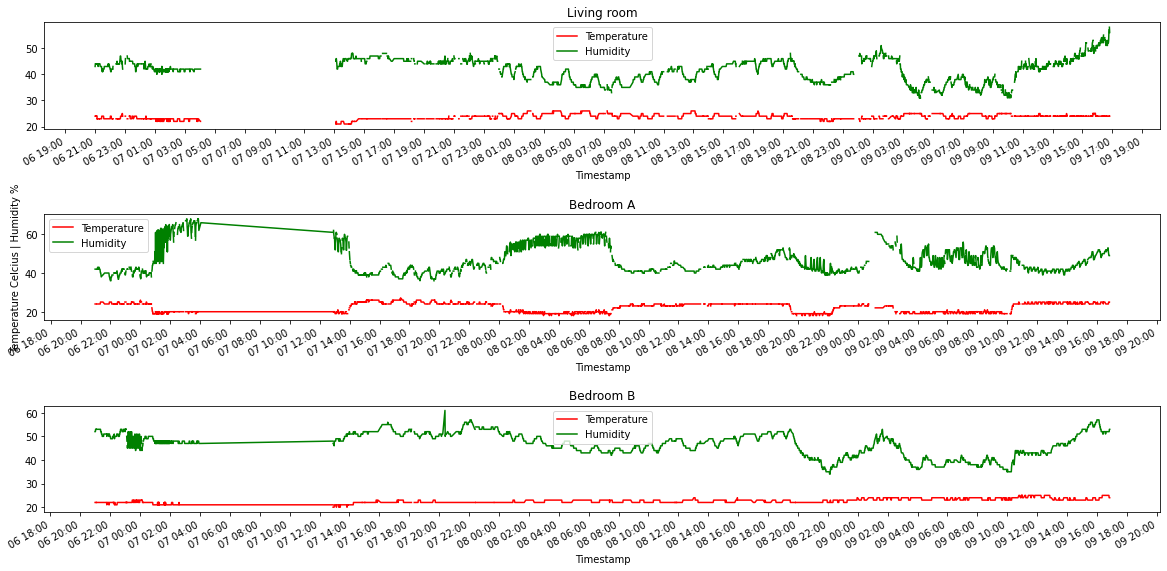

In [392]:
mofig, moaxs = plt.subplots(3,1, figsize=(20, 2), subplot_kw={
                        'ylim': (0, 2), 'yticks': [0, 1]})

xx0 = moaxs[0].get_xaxis()
xx1 = moaxs[1].get_xaxis()
xx0.set_visible(False)
xx1.set_visible(False)

moaxs[0].set(title="Living room")
moaxs[1].set(title="Room A")
moaxs[2].set(title="Room B")
plt.subplots_adjust(hspace=1)
date_form = DateFormatter("%d %H:%M")

livingRoom.plot(x="Timestamp", y=["Motion"], color=[
                "red", "green"], ax=moaxs[0])
roomA.plot(x="Timestamp", y=["Motion"], color=["red", "green"], ax=moaxs[1])
roomB.plot(x="Timestamp", y=["Motion"], color=["red", "green"], ax=moaxs[2])


fig , axs = plt.subplots(3,1,figsize=(20,10))
for ax in moaxs:     
        ax.xaxis.set_major_formatter(date_form)
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
axs[0].set(title="Living room")
axs[1].set(ylabel="Temperature Celcius | Humidity %",title="Bedroom A")
axs[2].set(xlabel="Time of day",title="Bedroom B")
plt.subplots_adjust(hspace=.8)
date_form = DateFormatter("%d %H:%M")
# axs= roomB.plot()
for ax in axs:
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))



livingRoom.plot(x="Timestamp",y=["Temperature","Humidity"],color=["red","green"],ax=axs[0])
roomA.plot(x="Timestamp",y=["Temperature","Humidity"],color=["red","green"],ax=axs[1])
roomB.plot(x="Timestamp",y=["Temperature","Humidity"],color=["red","green"],ax=axs[2])


<AxesSubplot:title={'center':'Bedroom B'}, xlabel='Timestamp'>

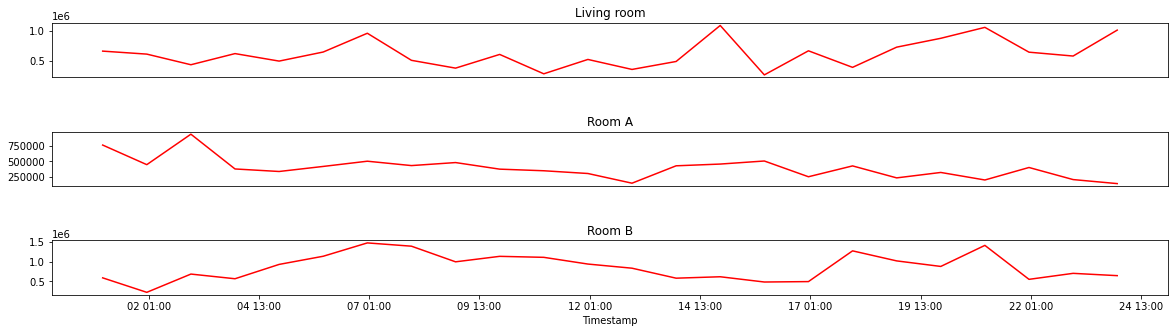

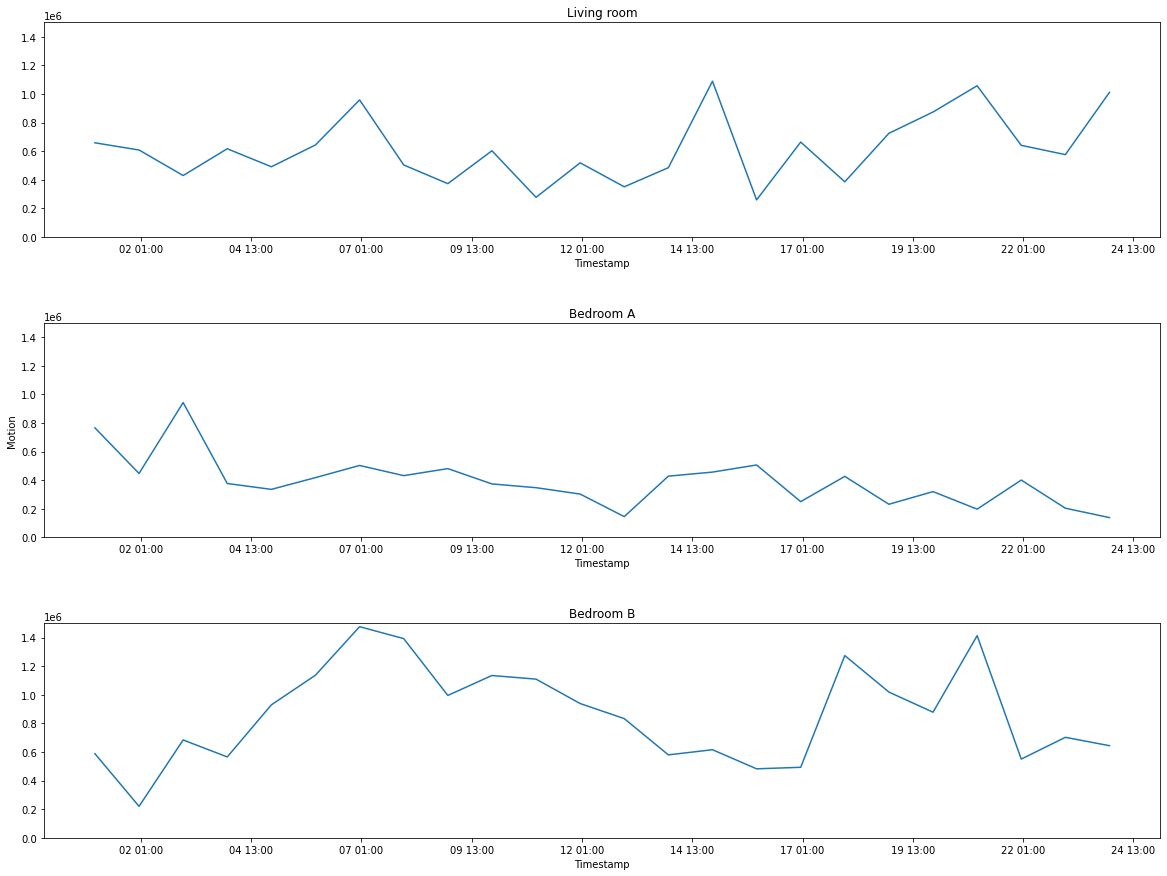

In [393]:
# x = roomA["PPM"]
# x = x[x.between(x.quantile(.15), x.quantile(.85))]  # without outliers
# roomA["PPM"] = x
# y = roomB["PPM"]
# y = y[y.between(y.quantile(.15), y.quantile(.85))]  # without outliers
# roomB["PPM"] = y
# z = livingRoom["PPM"]
# z = z[z.between(z.quantile(.15), y.quantile(.85))]  # without outliers
# livingRoom["PPM"] = z


mofig, moaxs = plt.subplots(3, 1, figsize=(20, 5))

xx0 = moaxs[0].get_xaxis()
xx1 = moaxs[1].get_xaxis()
xx0.set_visible(False)
xx1.set_visible(False)

moaxs[0].set(title="Living room")
moaxs[1].set(title="Room A")
moaxs[2].set(title="Room B")
plt.subplots_adjust(hspace=1)
date_form = DateFormatter("%d %H:%M")

livingRoom.groupby(livingRoom["Timestamp"].dt.hour)["PPM"].mean().plot(x="Timestamp", y=["Motion"], color=[
                "red", "green"], ax=moaxs[0])
roomA.groupby(roomA["Timestamp"].dt.hour).mean()["PPM"].plot(x="Timestamp", y=["Motion"], color=["red", "green"], ax=moaxs[1])
roomB.groupby(roomB["Timestamp"].dt.hour).mean()["PPM"].plot(x="Timestamp", y=["Motion"], color=["red", "green"], ax=moaxs[2])


fig, axs = plt.subplots(3, 1, figsize=(20, 15),subplot_kw={'ylim':(0,1500000)})
for ax in moaxs:
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=60))
axs[0].set(title="Living room")
axs[1].set(ylabel="Motion", title="Bedroom A")
axs[2].set(xlabel="Time of day", title="Bedroom B")
plt.subplots_adjust(hspace=.4)
date_form = DateFormatter("%d %H:%M")
# axs= roomB.plot()
for ax in axs:
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=60))

# livingRoom.plot(x="Timestamp", y=["PPM"], color=[
#                 "orange", "green"], ax=axs[0])
# roomA.plot(x="Timestamp", y=["PPM"], color=[
#            "orange", "green"], ax=axs[1])
# roomB.plot(x="Timestamp", y=["PPM"], color=[
#            "orange", "green"], ax=axs[2])

livingRoom.groupby(livingRoom["Timestamp"].dt.hour)[
    "PPM"].mean().plot(rot=0, ax=axs[0])
roomA.groupby(roomA["Timestamp"].dt.hour)[
    "PPM"].mean().plot(rot=0, ax=axs[1])
roomB.groupby(roomB["Timestamp"].dt.hour)[
    "PPM"].mean().plot(rot=0, ax=axs[2])


<AxesSubplot:title={'center':'Bedroom B'}, xlabel='Timestamp'>

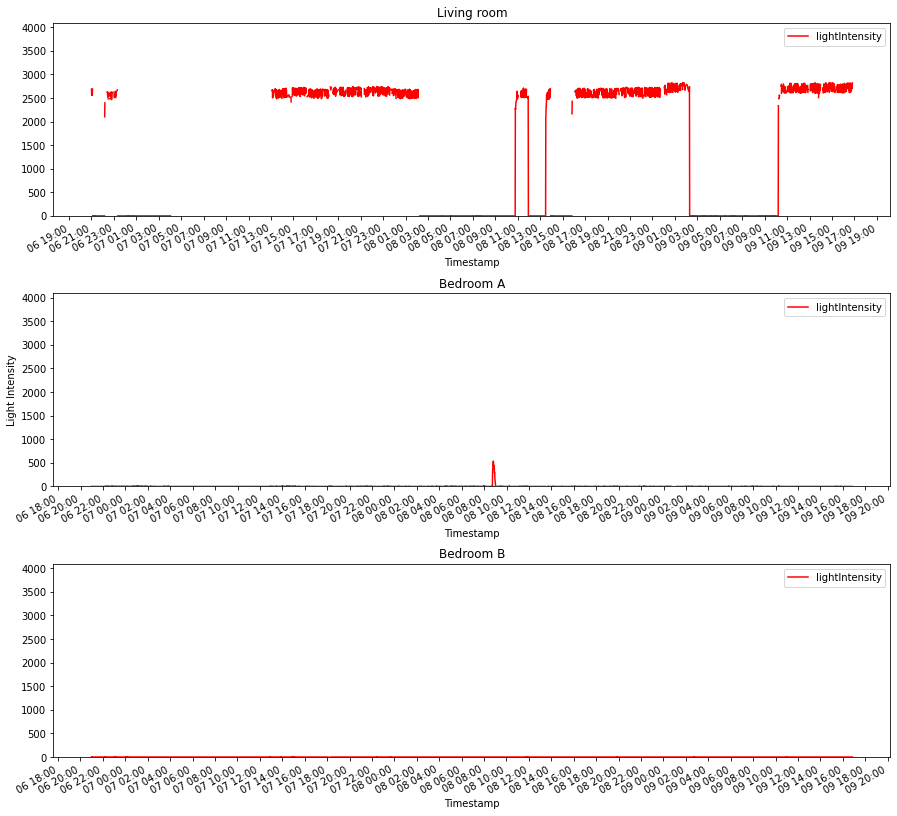

In [403]:
fig , axs = plt.subplots(3,1,figsize=(15,15),subplot_kw={'ylim':(0,4096)})
for ax in axs:     
        ax.xaxis.set_major_formatter(date_form)
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))

axs[0].set(title="Living room")
axs[1].set(ylabel="Light Intensity",title="Bedroom A")
axs[2].set(xlabel="Time of day",title="Bedroom B")
plt.subplots_adjust(hspace=0.4)
date_form = DateFormatter("%d %H:%M")
# axs= roomB.plot()

livingRoom.plot(x="Timestamp",y="lightIntensity",color=["red","green"],ax=axs[0])
roomA.plot(x="Timestamp",y="lightIntensity",color=["red","green"],ax=axs[1])
roomB.plot(x="Timestamp",y="lightIntensity",color=["red","green"],ax=axs[2])
